In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from numpy import expand_dims
import os
from tqdm import tqdm
import cv2

In [2]:
from keras.applications.vgg16 import VGG16
#Load the model
model = VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

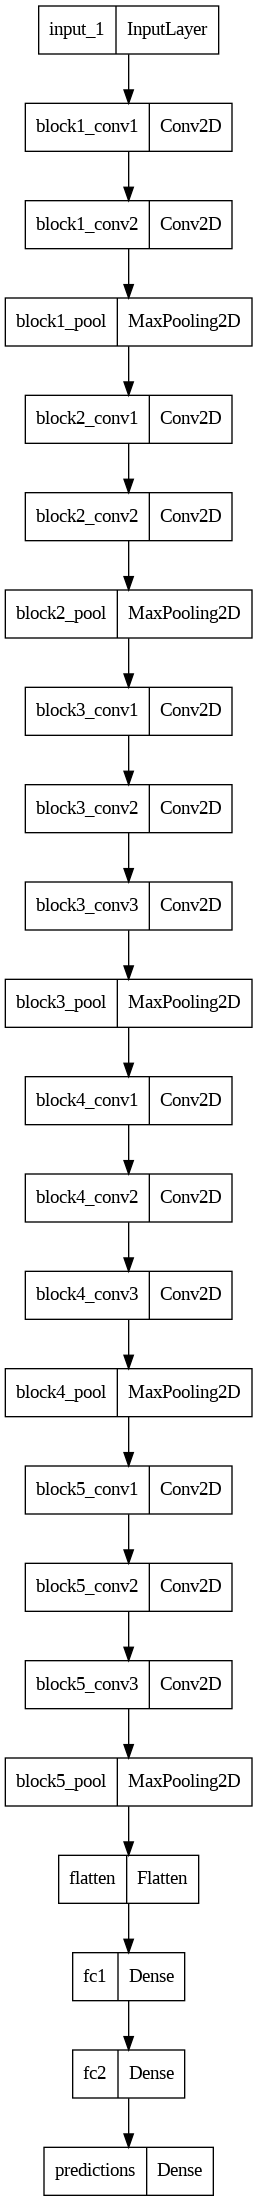

In [4]:
from keras.utils import plot_model

plot_model(model)

In [5]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [6]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [7]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

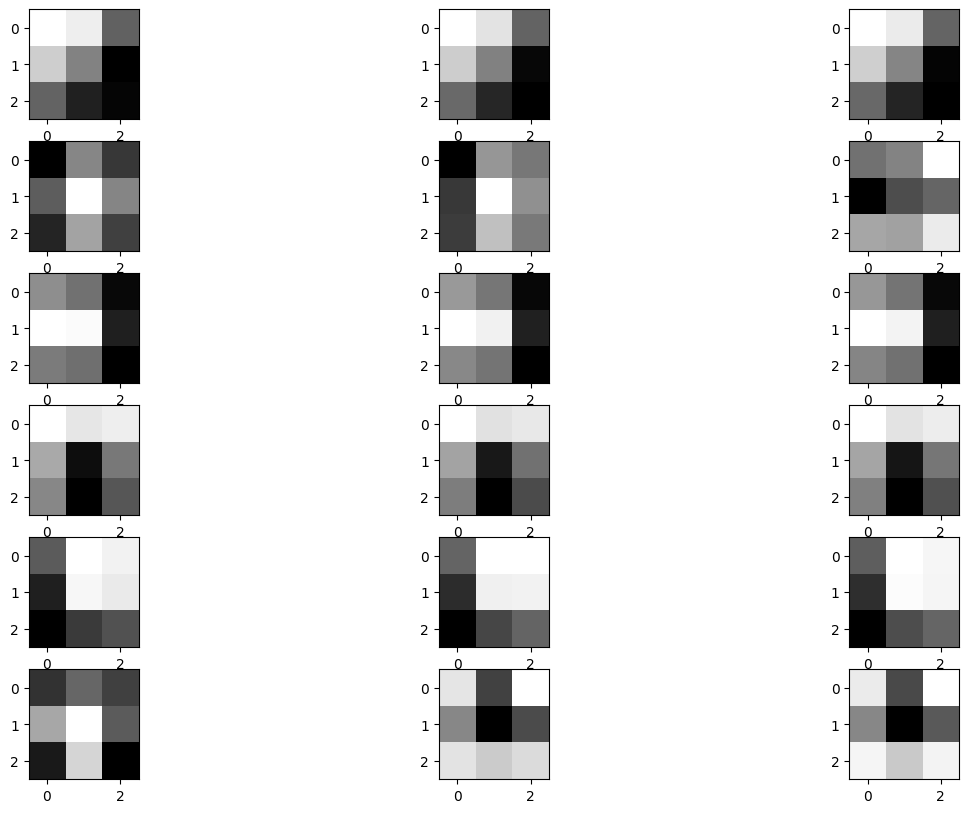

In [8]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

In [9]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Path to the main directory containing subdirectories of images
# main_directory = '/content/drive/MyDrive/Webcrawler- Satellite Images/feature_extraction1'
main_directory = '/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset'

In [13]:
# image2 = load_img("/content/drive/MyDrive/Webcrawler- Satellite Images/feature_extraction1/Copy of 20230929_2130.jpg" , target_size=(224,224))
image2 = load_img("/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/20230726/20230726_2015.jpg" , target_size=(224,224))
image1 = load_img("/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/20231212/20231212_0030.jpg" , target_size=(224,224))

# convert the image to an array
image1 = img_to_array(image1)
image2 = img_to_array(image2)
# expand dimensions so that it represents a single 'sample'
image1 = expand_dims(image1, axis=0)
image2 = expand_dims(image2, axis=0)

image1 = preprocess_input(image1)
image2 = preprocess_input(image2)

1/1 [==============================] - 0s 51ms/step


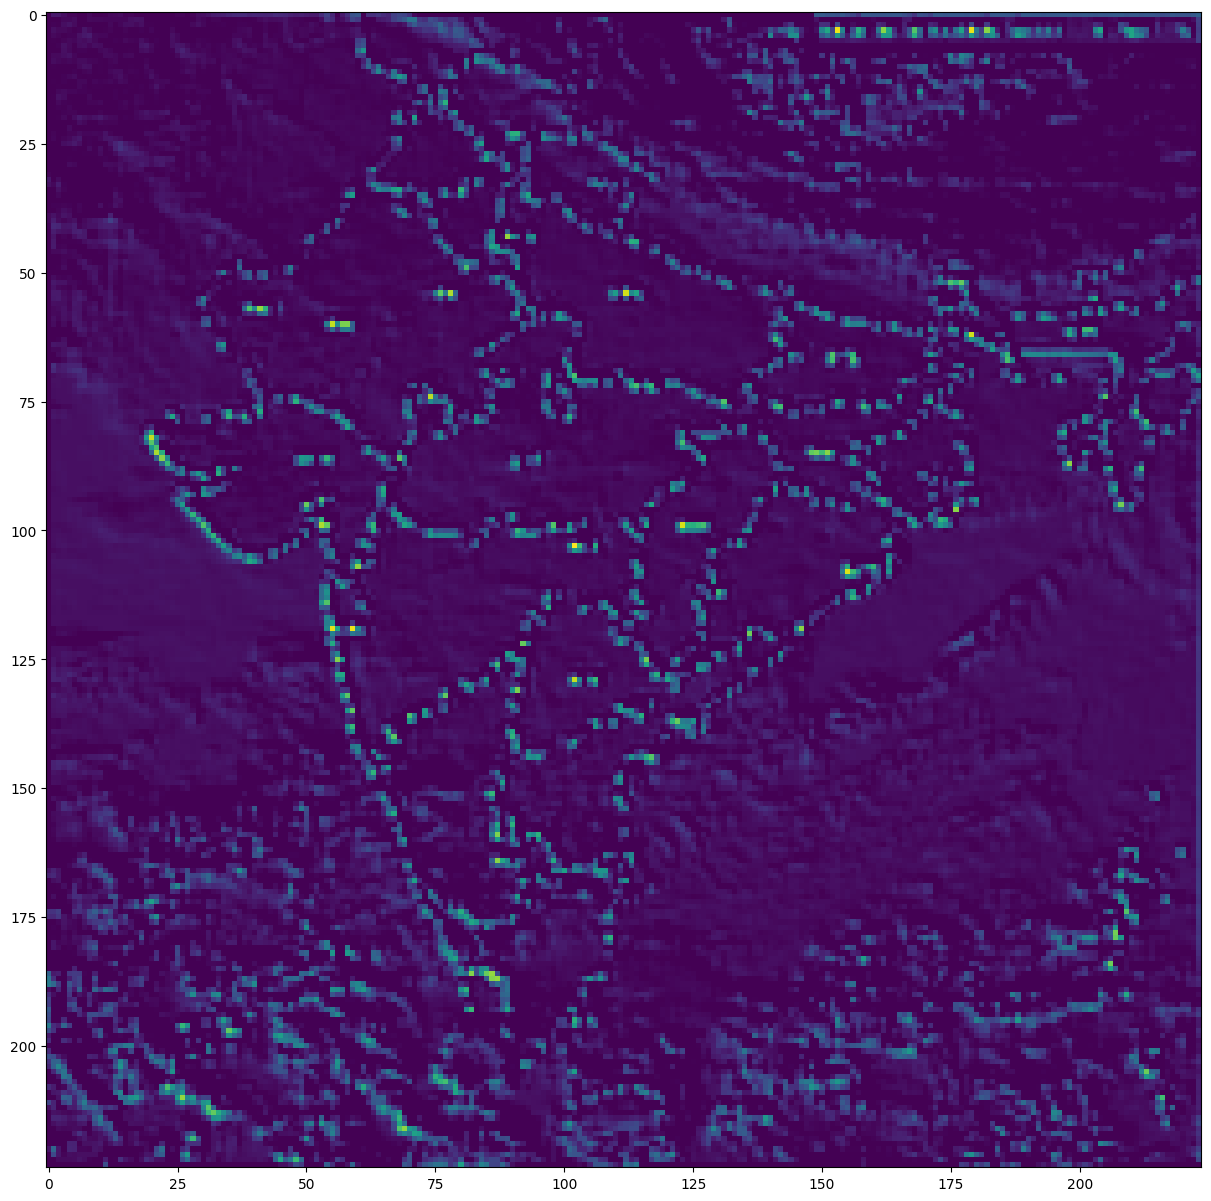

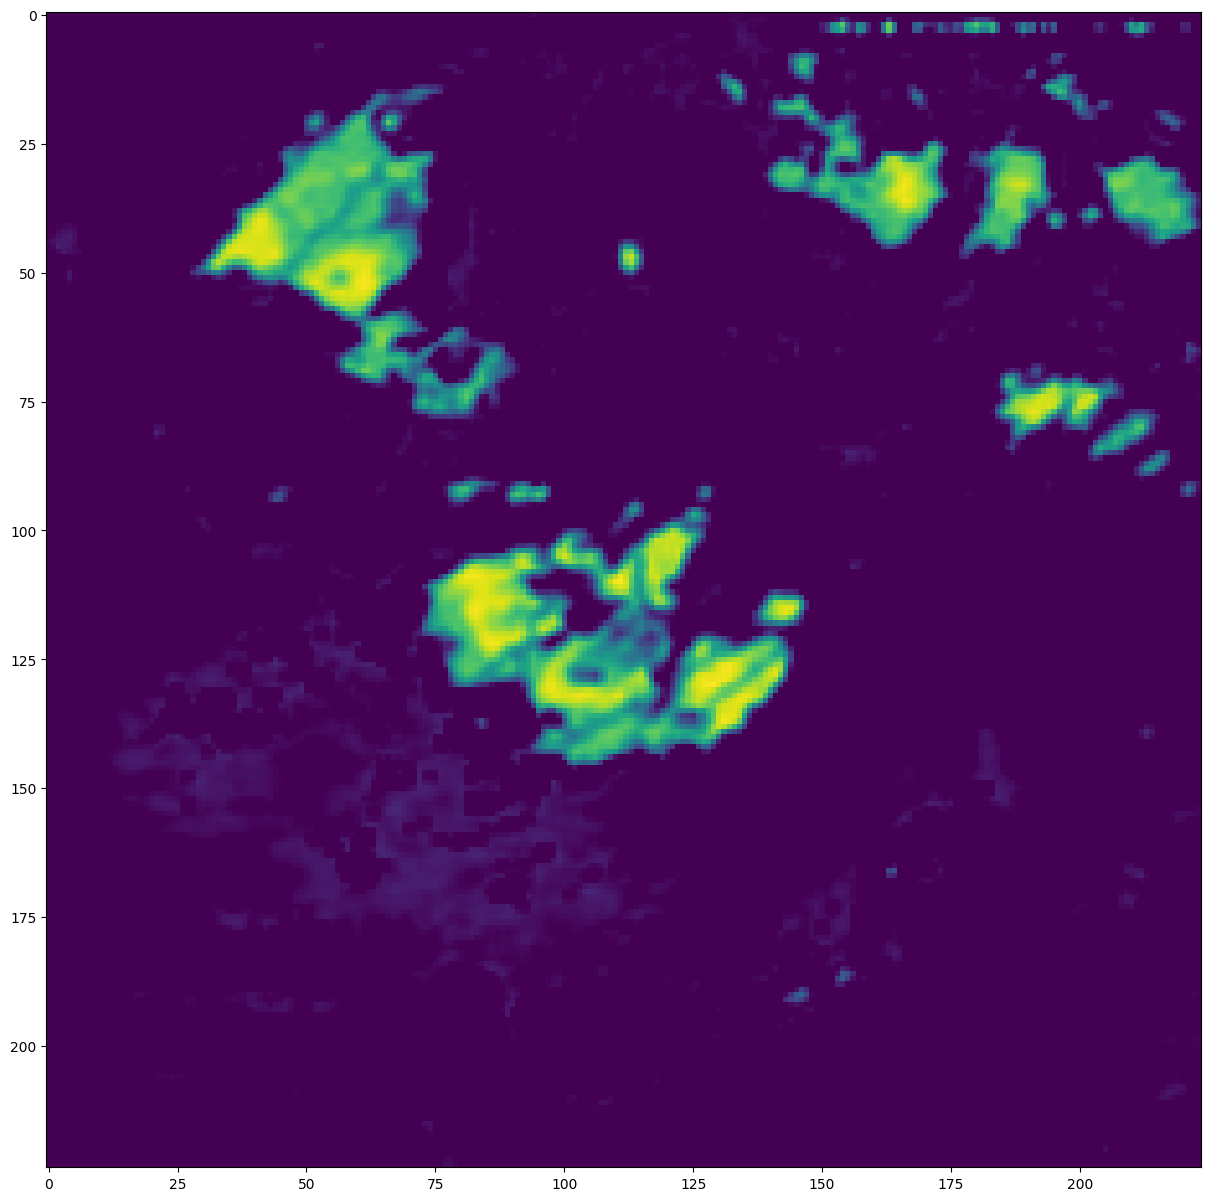

In [14]:
#calculating features_map
features1 = model.predict(image1)
features2 = model.predict(image2)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features1.shape[3]+1):
    # pyplot.subplot(8,8,i)
    # pyplot.imshow(features[0,:,:,i-1], cmap = "gray")
    pyplot.imshow(features1[0,:,:,11])
pyplot.show()

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features2.shape[3]+1):
    pyplot.imshow(features2[0,:,:,59])
pyplot.show()
# print(features[0,:,:,59])
# print(features[0,:,:,59].shape)

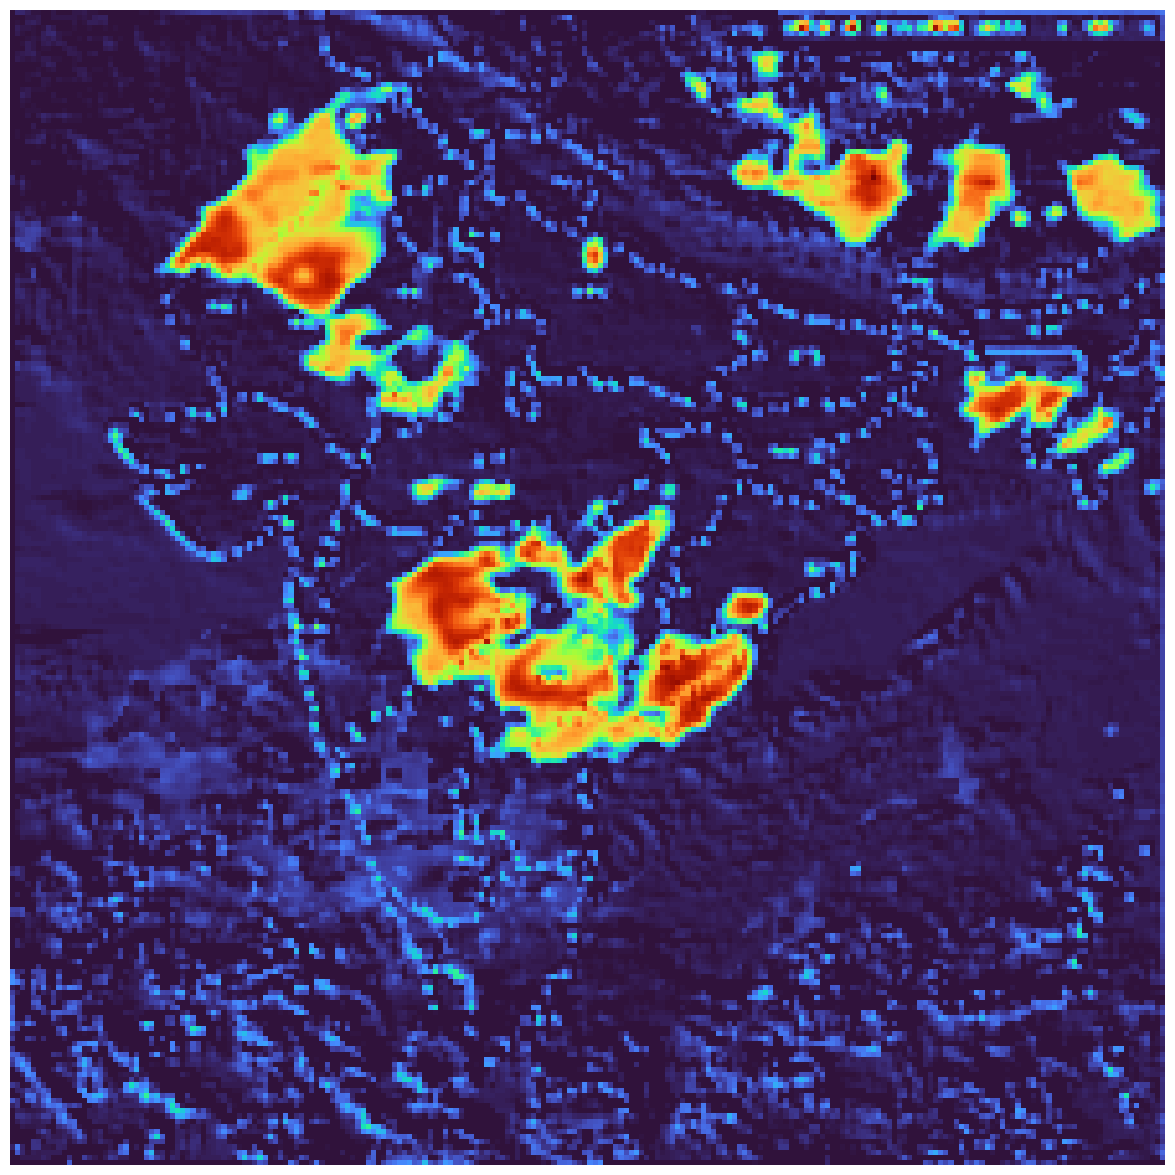

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming features1 and features2 are the feature maps obtained from the VGG16 model

# Superimpose features2 on features1
superimposed_features = np.add(features1[0,:,:,11], 3 * features2[0,:,:,59])

# Normalize the superimposed features to the range [0, 1]
superimposed_features = (superimposed_features - superimposed_features.min()) / (superimposed_features.max() - superimposed_features.min())

# Display the superimposed features
fig = plt.figure(figsize=(20, 15))
plt.imshow(superimposed_features, cmap='turbo')
plt.axis("off")

plt.show()


In [17]:
import numpy as np
import csv

# Assuming superimposed_features is the resulting superimposed feature map
superimposed_features = np.add(features1[0, :, :, 11], 3 * features2[0, :, :, 59])

# Normalize the superimposed features to the range [0, 1]
superimposed_features = (superimposed_features - superimposed_features.min()) / (superimposed_features.max() - superimposed_features.min())

# Save the superimposed features to a CSV file
csv_file_path = "/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/superimposed_features.csv"
np.savetxt(csv_file_path, superimposed_features, delimiter=",")

print(f"Superimposed features saved to: {csv_file_path}")


Superimposed features saved to: /content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/superimposed_features.csv


In [18]:
import numpy as np
import csv

# Assuming features1 and features2 are the feature maps obtained from the VGG16 model

# Superimpose features2 on features1
superimposed_features = np.add(features1[0, :, :, 11], 3 * features2[0, :, :, 59])

# Normalize the superimposed features to the range [0, 1]
superimposed_features = (superimposed_features - superimposed_features.min()) / (superimposed_features.max() - superimposed_features.min())

# Flatten the superimposed features into a single row
flattened_features = superimposed_features.flatten()

# Save the flattened features to a CSV file
csv_file_path = "/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/flattened_features.csv"
np.savetxt(csv_file_path, flattened_features, delimiter=",")

print(f"Flattened features saved to: {csv_file_path}")

print(flattened_features.shape)

Flattened features saved to: /content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/flattened_features.csv
(50176,)


In [19]:
import numpy as np
import csv

# Assuming features1 and features2 are the feature maps obtained from the VGG16 model

# Superimpose features2 on features1
superimposed_features = np.add(features1[0, :, :, 11], 3 * features2[0, :, :, 59])

# Normalize the superimposed features to the range [0, 1]
superimposed_features = (superimposed_features - superimposed_features.min()) / (superimposed_features.max() - superimposed_features.min())

# Flatten the superimposed features into a single row
flattened_features = superimposed_features.flatten()

# Save the flattened features to a CSV file horizontally
csv_file_path = "/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/flattened_features1.csv"
np.savetxt(csv_file_path, flattened_features[np.newaxis, :], delimiter=",")

print(f"Flattened features saved to: {csv_file_path}")

print(flattened_features.shape)


Flattened features saved to: /content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/flattened_features1.csv
(50176,)


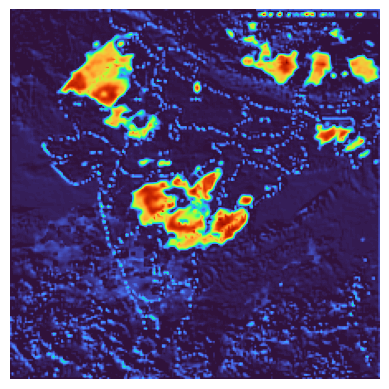

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load flattened features from CSV
csv_file_path = "/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/flattened_features.csv"
flattened_features = np.loadtxt(csv_file_path, delimiter=",")

# Assuming the original image shape is (height, width, channels)
original_shape = (224, 224, 1)  # Adjust this according to your image dimensions

# Reshape the flattened features back to the original shape
reshaped_features = flattened_features.reshape(original_shape)

# Display the reshaped features as an image
plt.imshow(reshaped_features[:, :, 0], cmap='turbo')
plt.axis("off")
plt.show()


In [21]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

EXTRACT FEATURES FOR ALL IMAGES

In [ ]:
# Function to extract features from an image
def extract_features(image_path, model, target_size=(224, 224)):
    try:
        image = load_img(image_path, target_size=target_size)
        image_array = img_to_array(image)
        image_array = expand_dims(image_array, axis=0)
        image_array = preprocess_input(image_array)
        features = model.predict(image_array)
        return features

    except OSError as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to extract features from an image without superimposing
def extract_features_only(image_path, model, features1, target_size=(224, 224)):
    try:
        # Load and preprocess the image
        image = load_img(image_path, target_size=target_size)
        image_array = img_to_array(image)
        image_array = expand_dims(image_array, axis=0)
        image_array = preprocess_input(image_array)

        # Extract features using the model
        features = model.predict(image_array)

        # Flatten the features into a single row
        flattened_features = features.flatten()

        return flattened_features

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


# Set the base directory for the dataset
base_directory = '/content/drive/MyDrive/Nowcasting_project/SKYSAT_Dataset/'

# Date range from 20230725 to 20240122
start_date = '20230725'
end_date = '20231212'

# Define the time intervals (every 15 minutes)
time_intervals = ['0000', '0015', '0030', '0045']

# Create an empty DataFrame to store the features
columns = ['ImageName'] + [f'Feature_{i}' for i in range(1, 224*224 + 1)]  # Update the feature dimensionality
features_df = pd.DataFrame(columns=columns)

for date in pd.date_range(start=start_date, end=end_date, freq='D').strftime('%Y%m%d'):
    date_directory = os.path.join(base_directory, date)

    for time_interval in time_intervals:
        image_name = f"{date}_{time_interval}"
        image_path = os.path.join(date_directory, f"{image_name}.jpg")

        # Extract features from the image (without superimposing)
        flattened_features = extract_features_only(image_path, model, features1)

        if flattened_features is not None:
            # Truncate or pad flattened_features to match the length of columns
            flattened_features = flattened_features[:len(columns)-1]
            flattened_features = np.pad(flattened_features, (0, len(columns)-1 - len(flattened_features)), 'constant', constant_values=np.nan)

            # Save the flattened features to the DataFrame
            features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
        else:
            # If features are not available, create an empty row with NaN values
            flattened_features = np.full((len(columns)-1,), np.nan)
            features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)

# Save the DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/Webcrawler- Satellite Images/csv/extracted_features_dataset.csv'
features_df.to_csv(output_csv_path, index=False)

print(f"Extracted features saved to {output_csv_path}")


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230814/20230814_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230814/20230814_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230827/20230827_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230827/20230827_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 66ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230918/20230918_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230918/20230918_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230922/20230922_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230922/20230922_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230926/20230926_0030.jpg: image file is truncated (28 bytes not processed)


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230930/20230930_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230930/20230930_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231001/20231001_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231001/20231001_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231006/20231006_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231006/20231006_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231007/20231007_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231007/20231007_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231010/20231010_0045.jpg: image file is truncated (92 bytes not processed)


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231014/20231014_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231014/20231014_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231018/20231018_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231018/20231018_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231023/20231023_0030.jpg: image file is truncated (2 bytes not processed)


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231029/20231029_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231029/20231029_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231125/20231125_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231125/20231125_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231127/20231127_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231127/20231127_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231128/20231128_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231128/20231128_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231129/20231129_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231129/20231129_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231203/20231203_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231203/20231203_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231210/20231210_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231210/20231210_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231224/20231224_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231224/20231224_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231227/20231227_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231227/20231227_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-163-7e9e30be6e4b>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0000.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0015.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0030.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0045.jpg'


<ipython-input-163-7e9e30be6e4b>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Extracted features saved to /content/drive/MyDrive/Webcrawler- Satellite Images/csv/extracted_features_dataset.csv


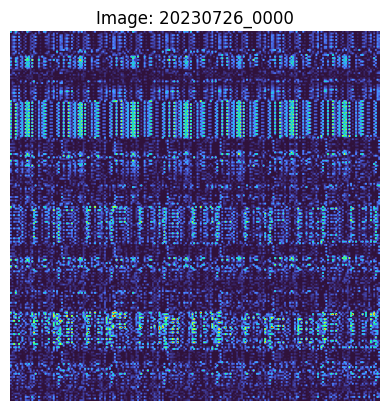

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load flattened features from CSV using pandas
csv_file_path = "/content/drive/MyDrive/Webcrawler- Satellite Images/csv/extracted_features_dataset.csv"
df = pd.read_csv(csv_file_path)

# Get the features for the 5th image
features = df.iloc[4, 1:].values

# Convert the features to float and handle NaN values
features = features.astype(float)
features[np.isnan(features)] = 0.0  # You can choose another value for NaN if needed

# Assuming the original image shape is (height, width, channels)
original_shape = (224, 224, 1)  # Adjust this according to your image dimensions

# Reshape the flattened features back to the original shape
reshaped_features = features.reshape(original_shape)

# Display the reshaped features as an image using features[0, :, :, 0]
plt.imshow(reshaped_features[:, :, 0], cmap='turbo')
plt.title(f"Image: {df.iloc[4]['ImageName']}")
plt.axis("off")
plt.show()


FOR SUPERIMPOSE


In [ ]:
# # Function to extract and superimpose features from an image
# # Function to extract and superimpose features from an image
# def extract_and_superimpose_features(image_path, model, features1, target_size=(224, 224)):
#     try:
#         # Extract features from the image
#         image_features = extract_features(image_path, model, target_size)

#         # Reshape image features to match the shape of features1[0, :, :, 11]
#         image_features_reshaped = image_features.reshape((1, 224, 224, -1))

#         # Superimpose features on features1
#         superimposed_features = np.add(features1[0, :, :, 11], 3 * image_features_reshaped[0, :, :, 0])

#         # Normalize the superimposed features to the range [0, 1]
#         superimposed_features = (superimposed_features - superimposed_features.min()) / (superimposed_features.max() - superimposed_features.min())

#         # Flatten the superimposed features into a single row
#         flattened_features = superimposed_features.flatten()

#         return flattened_features

#     except OSError as e:
#         print(f"Error processing {image_path}: {e}")
#         return None

# # Set the base directory for the dataset
# base_directory = '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset'

# # Date range from 20230725 to 20240122
# start_date = '20230725'
# end_date = '20240122'

# # Define the time intervals (every 15 minutes)
# time_intervals = ['0000', '0015', '0030', '0045']

# # Create an empty DataFrame to store the features
# columns = ['ImageName'] + [f'Feature_{i}' for i in range(1, 4097)]  # Adjust feature dimensionality
# features_df = pd.DataFrame(columns=columns)

# # Iterate through dates and time intervals
# for date in pd.date_range(start=start_date, end=end_date, freq='D').strftime('%Y%m%d'):
#     date_directory = os.path.join(base_directory, date)

#     for time_interval in time_intervals:
#         image_name = f"{date}_{time_interval}"
#         image_path = os.path.join(date_directory, f"{image_name}.jpg")

#         # Extract and superimpose features from the image
#         flattened_features = extract_and_superimpose_features(image_path, model, features1)

#         if flattened_features is not None:
#             # Truncate flattened_features to match the length of columns
#             flattened_features = flattened_features[:len(columns)-1]
#         else:
#             # If features are not available, create an empty row with NaN values
#             flattened_features = np.full((len(columns)-1,), np.nan)

#         # Save the flattened features to the DataFrame
#         features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)

# # Save the DataFrame to a CSV file
# output_csv_path = '/content/drive/MyDrive/Webcrawler- Satellite Images/csv/superimposed_features_dataset.csv'
# features_df.to_csv(output_csv_path, index=False)

# print(f"Superimposed features saved to {output_csv_path}")


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230728/20230728_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230802/20230802_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230803/20230803_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230804/20230804_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230805/20230805_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230806/20230806_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230807/20230807_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230812/20230812_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230814/20230814_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230814/20230814_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230817/20230817_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230818/20230818_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230819/20230819_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230820/20230820_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230823/20230823_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230826/20230826_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230827/20230827_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230827/20230827_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230829/20230829_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230831/20230831_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230901/20230901_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230902/20230902_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230903/20230903_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230906/20230906_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230909/20230909_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230914/20230914_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230916/20230916_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230917/20230917_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230918/20230918_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230918/20230918_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230919/20230919_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 81ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230921/20230921_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230922/20230922_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230922/20230922_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230924/20230924_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230926/20230926_0030.jpg: image file is truncated (28 bytes not processed)
1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230927/20230927_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230928/20230928_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230929/20230929_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230930/20230930_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20230930/20230930_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231001/20231001_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231001/20231001_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231002/20231002_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231006/20231006_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231006/20231006_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231007/20231007_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231007/20231007_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231009/20231009_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231010/20231010_0045.jpg: image file is truncated (92 bytes not processed)


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231012/20231012_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231013/20231013_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231014/20231014_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231014/20231014_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231015/20231015_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231018/20231018_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231018/20231018_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231023/20231023_0030.jpg: image file is truncated (2 bytes not processed)


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231024/20231024_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231028/20231028_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231029/20231029_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231029/20231029_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231030/20231030_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231031/20231031_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231101/20231101_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231102/20231102_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231105/20231105_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231106/20231106_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231107/20231107_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231109/20231109_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231110/20231110_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231111/20231111_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231112/20231112_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231113/20231113_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231115/20231115_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231117/20231117_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231118/20231118_0045.jpg'
1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231120/20231120_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231122/20231122_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231123/20231123_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231124/20231124_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231125/20231125_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231125/20231125_0030.jpg'
1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231126/20231126_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231127/20231127_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231127/20231127_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231128/20231128_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231128/20231128_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 65ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 56ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231129/20231129_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231129/20231129_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231130/20231130_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231203/20231203_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231203/20231203_0030.jpg'
1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 87ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231207/20231207_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231209/20231209_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231210/20231210_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231210/20231210_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 54ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 69ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231213/20231213_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231214/20231214_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231215/20231215_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231216/20231216_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231217/20231217_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231218/20231218_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231219/20231219_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231222/20231222_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231224/20231224_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231224/20231224_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231225/20231225_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231226/20231226_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231227/20231227_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231227/20231227_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231228/20231228_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231229/20231229_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231230/20231230_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20231231/20231231_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240101/20240101_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0030.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240102/20240102_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240103/20240103_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240104/20240104_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240105/20240105_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240106/20240106_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240107/20240107_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240108/20240108_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0000.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240110/20240110_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240111/20240111_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240112/20240112_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240113/20240113_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0015.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240114/20240114_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240115/20240115_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240116/20240116_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


1/1 [==============================] - 0s 34ms/step
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240118/20240118_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240119/20240119_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240120/20240120_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240121/20240121_0045.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0000.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0000.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0015.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0015.jpg'
Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0030.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0030.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)
<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Error processing /content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0045.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Webcrawler- Satellite Images/SKYSAT_Dataset/20240122/20240122_0045.jpg'


<ipython-input-155-eb75ba6f615d>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(pd.Series([image_name] + flattened_features.tolist(), index=columns), ignore_index=True)


Superimposed features saved to /content/drive/MyDrive/Webcrawler- Satellite Images/csv/superimposed_features_dataset.csv
